In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

encoded = pd.read_parquet('../cache/encoded_90q.parquet')
encoded.head()

,Timestamp,Actor1Country,Actor1GeoCountry,Actor1Type,Actor2Country,Actor2GeoCountry,Actor2Type,ActionCountry,EventType,GoldsteinScale,NumSources,NumArticles,AvgTone,Magnitude,Impact,Impact_bin,pct_change_15min,pct_change_30min,pct_change_24h,AbsChange
Date,,,,,,,,,,,,,,,,,,,,
2019-01-01,1546300800,9,13,9,13,11,9,11,5,3.4,4,50,2.354384,6.85,2.33,Positive,-0.033061,-0.226363,-2.433464,0.226363
2019-01-01,1546300800,9,13,9,13,11,9,11,8,4.0,3,30,-0.339542,3.34,1.34,Slightly Positive,-0.033061,-0.226363,-2.433464,0.226363
2019-01-01,1546300800,9,13,9,13,11,9,11,10,3.2,10,40,1.734061,8.73,2.79,Positive,-0.033061,-0.226363,-2.433464,0.226363
2019-01-01,1546300800,9,13,9,13,11,9,11,6,-2.0,3,21,-4.170072,6.72,-1.34,Slightly Negative,-0.033061,-0.226363,-2.433464,0.226363
2019-01-01,1546300800,9,13,9,13,11,9,11,10,1.9,6,18,1.415701,5.32,1.01,Slightly Positive,-0.033061,-0.226363,-2.433464,0.226363


In [2]:
encoded.dtypes

Timestamp             int64
Actor1Country         int32
Actor1GeoCountry      int32
Actor1Type            int32
Actor2Country         int32
Actor2GeoCountry      int32
Actor2Type            int32
ActionCountry         int32
EventType             int32
GoldsteinScale      float64
NumSources            int64
NumArticles           int64
AvgTone             float64
Magnitude           float64
Impact              float64
Impact_bin           object
pct_change_15min    float64
pct_change_30min    float64
pct_change_24h      float64
AbsChange           float64
dtype: object

In [3]:
numerical_columns = encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_columns = merged.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove the target variable from the lists if present
# numerical_columns = [col for col in numerical_columns if col != 'pct_change_30min']


In [4]:
# Compute correlations between numerical columns and the numerical target variable (pearson)
correlations = encoded[numerical_columns].corr()
correlations_30min = correlations['pct_change_30min'].drop('pct_change_30min').sort_values(ascending=False)
correlations_15min = correlations['pct_change_15min'].drop('pct_change_15min').sort_values(ascending=False)
correlations_24h = correlations['pct_change_24h'].drop('pct_change_24h').sort_values(ascending=False)
print(correlations_15min)
print("--------------------------------")
print(correlations_30min)
print("--------------------------------")
print(correlations_24h)

pct_change_30min    0.705240
pct_change_24h      0.110572
AbsChange           0.004070
GoldsteinScale      0.000435
AvgTone             0.000356
Impact             -0.000027
NumSources         -0.000635
NumArticles        -0.000876
Magnitude          -0.001331
Timestamp          -0.001693
Name: pct_change_15min, dtype: float64
--------------------------------
pct_change_15min    0.705240
pct_change_24h      0.155786
AvgTone             0.000500
GoldsteinScale      0.000035
Impact             -0.000482
NumSources         -0.000582
NumArticles        -0.001011
Magnitude          -0.001102
Timestamp          -0.003095
AbsChange          -0.008489
Name: pct_change_30min, dtype: float64
--------------------------------
pct_change_30min    0.155786
pct_change_15min    0.110572
AbsChange           0.026568
Magnitude           0.002337
NumArticles         0.001958
NumSources          0.000891
GoldsteinScale     -0.000632
AvgTone            -0.000782
Impact             -0.000932
Timestamp      

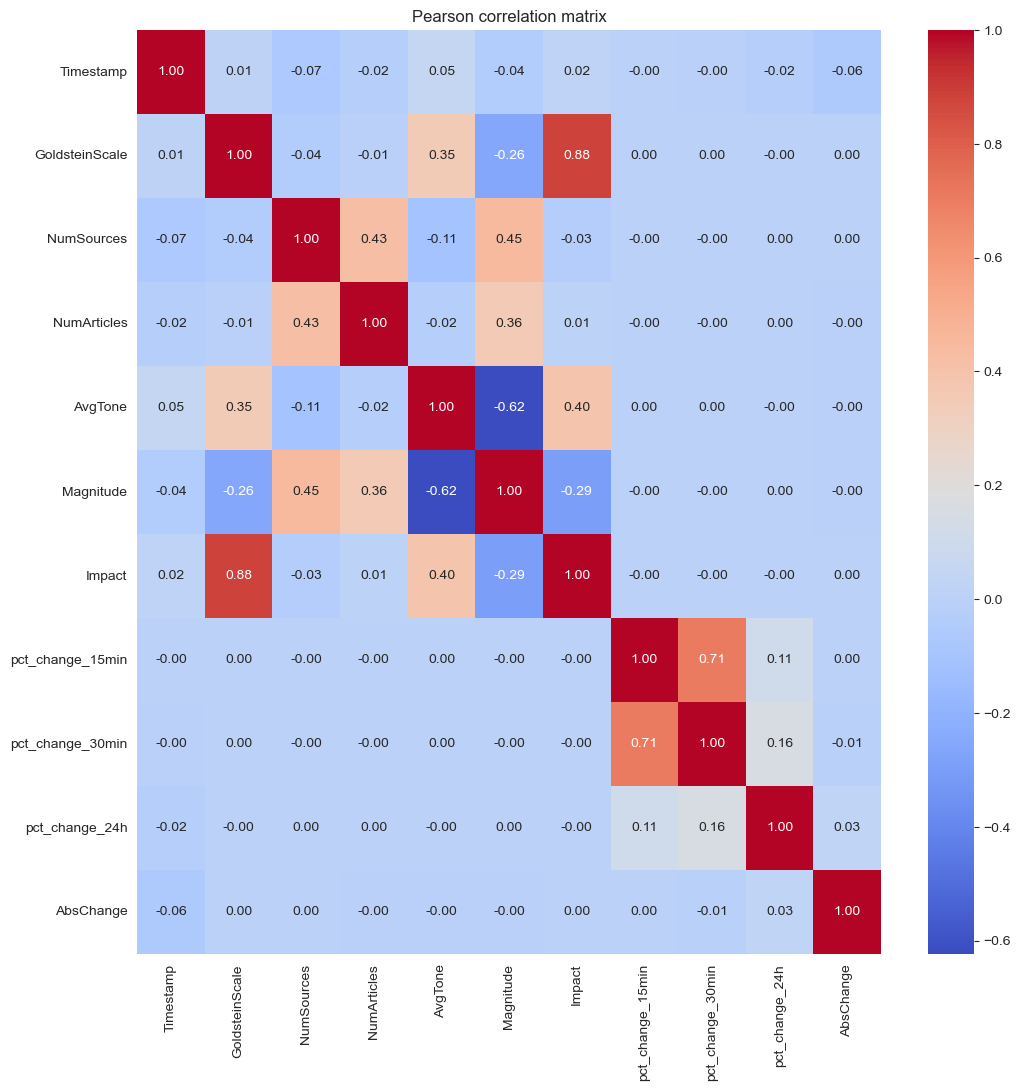

In [5]:
# Plot correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(correlations, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson correlation matrix')
plt.show()

In [6]:
# Compute correlations between numerical columns and the numerical target variable (spearman)
spearman_correlations = encoded[numerical_columns].corr(method='spearman')
correlations_30min = spearman_correlations['pct_change_30min'].drop('pct_change_30min').sort_values(ascending=False)
correlations_15min = spearman_correlations['pct_change_15min'].drop('pct_change_15min').sort_values(ascending=False)
correlations_24h = spearman_correlations['pct_change_24h'].drop('pct_change_24h').sort_values(ascending=False)
print(correlations_15min)
print("--------------------------------")
print(correlations_30min)
print("--------------------------------")
print(correlations_24h)

pct_change_30min    0.657065
pct_change_24h      0.098908
AbsChange           0.016578
NumSources          0.002727
Magnitude           0.000380
NumArticles         0.000352
Impact              0.000115
GoldsteinScale     -0.000007
AvgTone            -0.000804
Timestamp          -0.004861
Name: pct_change_15min, dtype: float64
--------------------------------
pct_change_15min    0.657065
pct_change_24h      0.139075
AbsChange           0.018366
NumSources          0.003599
Magnitude           0.001432
NumArticles         0.000541
Impact             -0.000339
GoldsteinScale     -0.000683
AvgTone            -0.001088
Timestamp          -0.006527
Name: pct_change_30min, dtype: float64
--------------------------------
pct_change_30min    0.139075
pct_change_15min    0.098908
AbsChange           0.021671
NumArticles         0.002663
Magnitude           0.002239
NumSources          0.001558
Impact             -0.000777
GoldsteinScale     -0.000797
AvgTone            -0.000953
Timestamp      

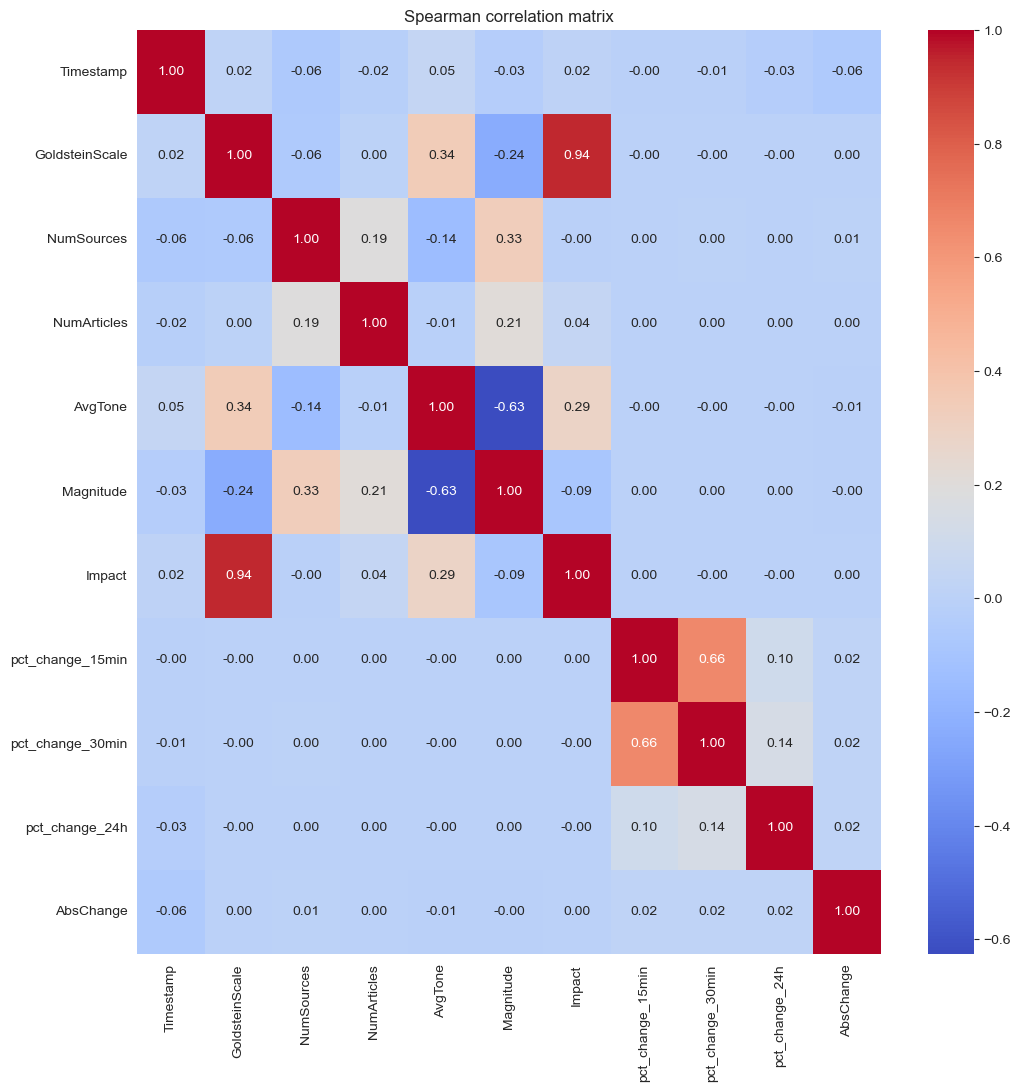

In [7]:
# Plot correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(spearman_correlations, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Spearman correlation matrix')
plt.show()

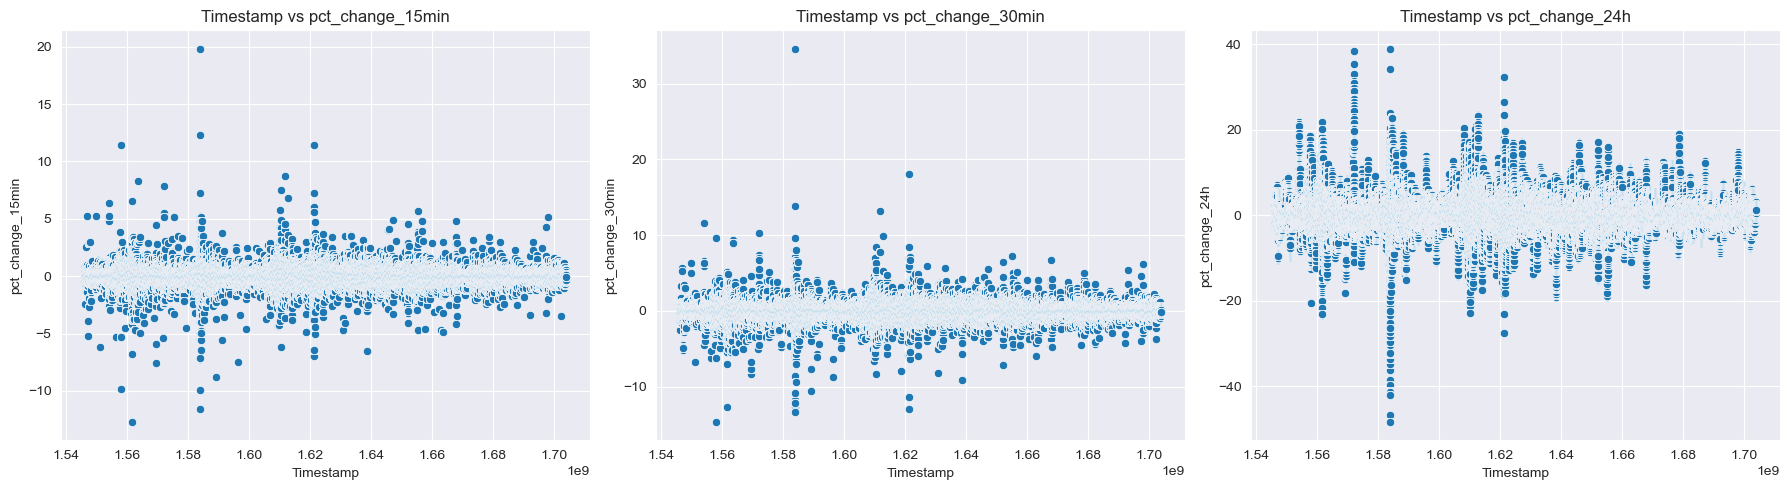

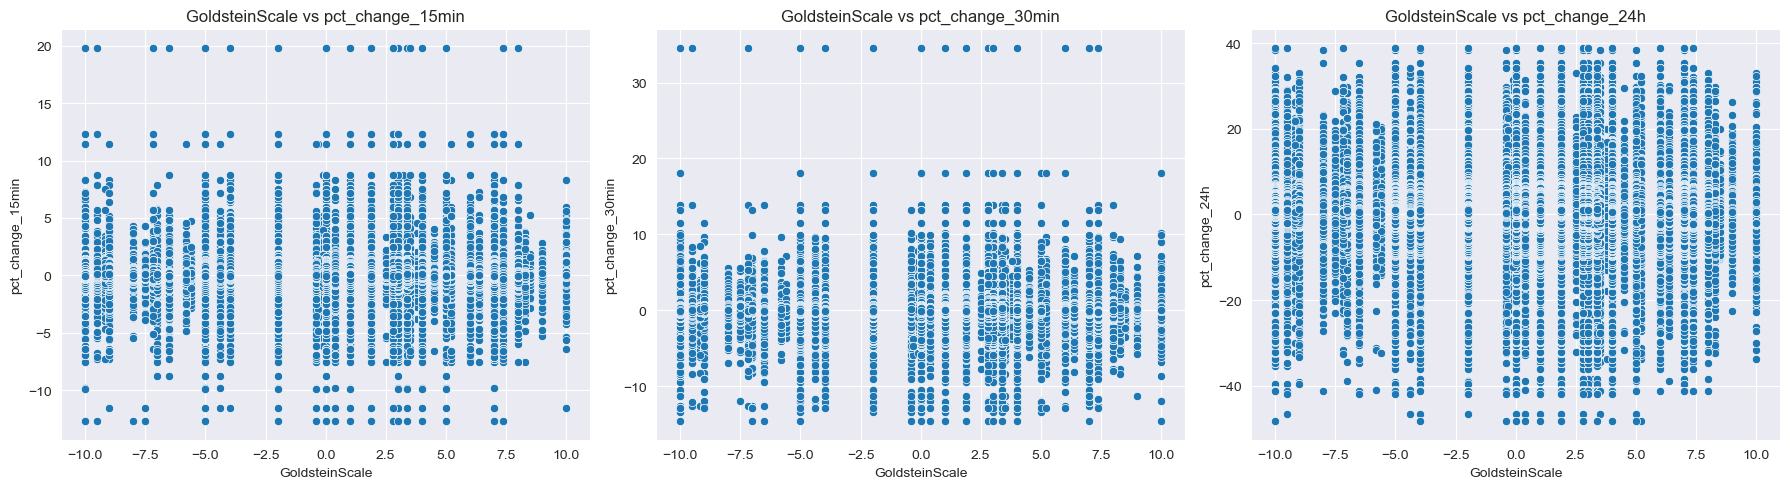

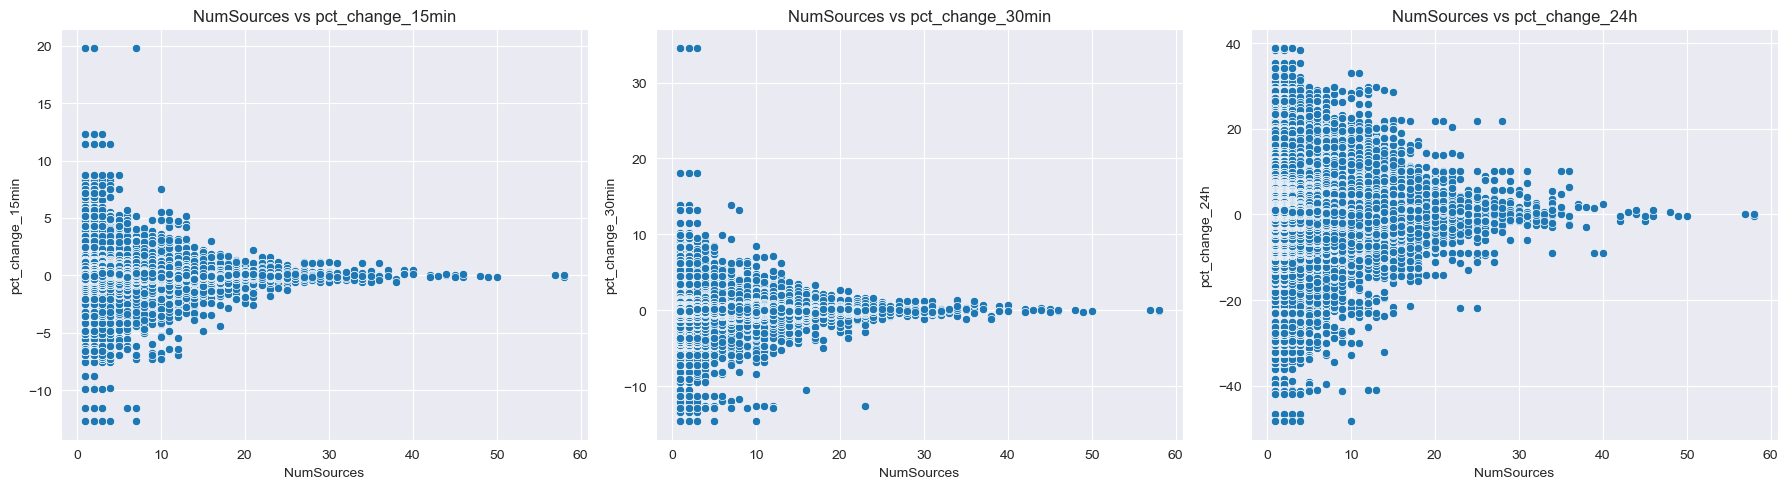

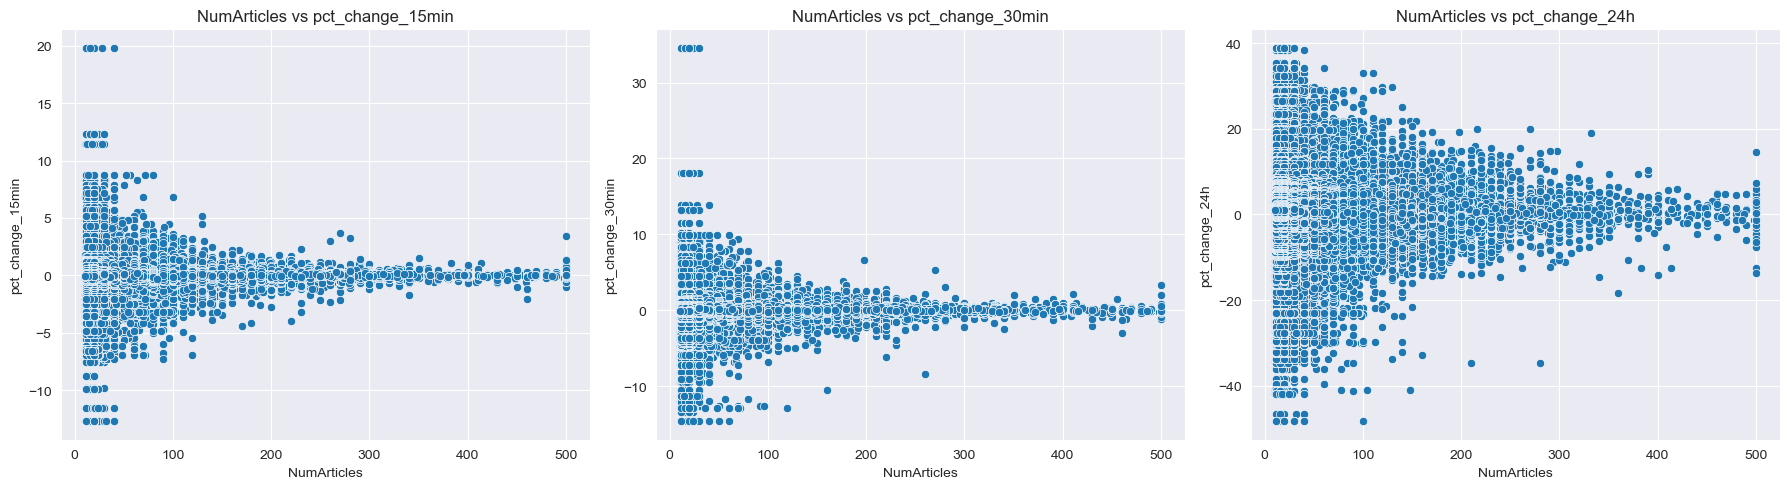

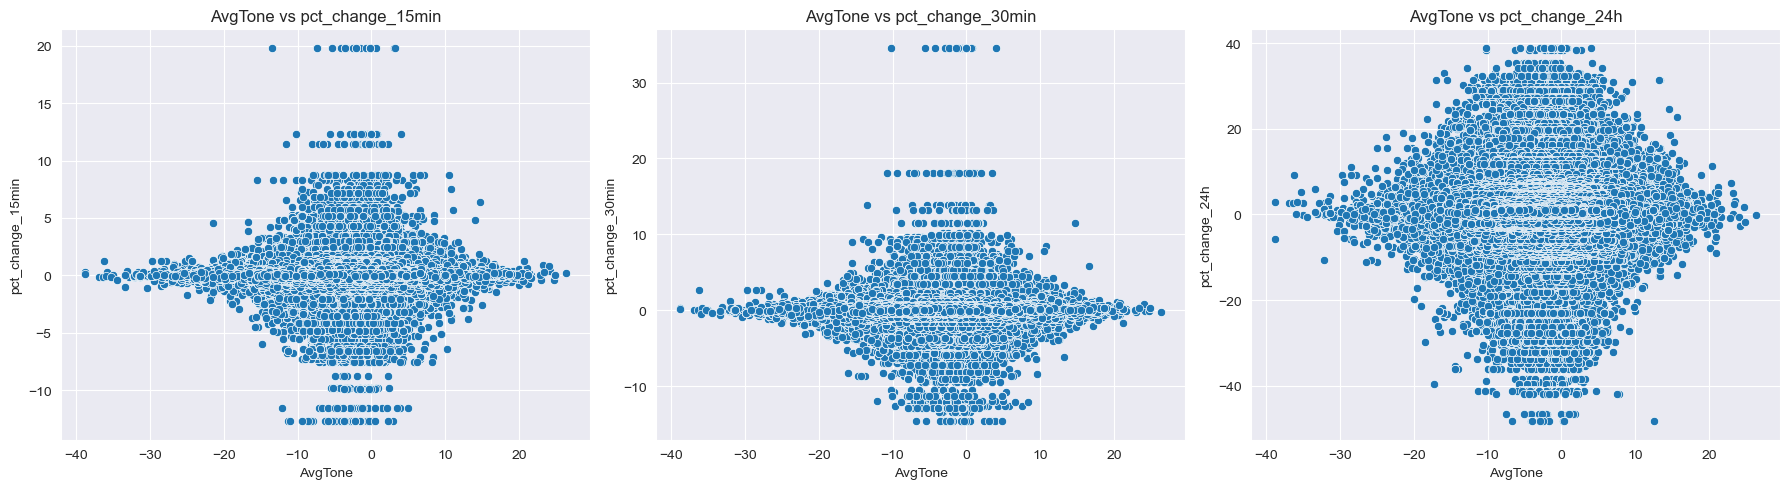

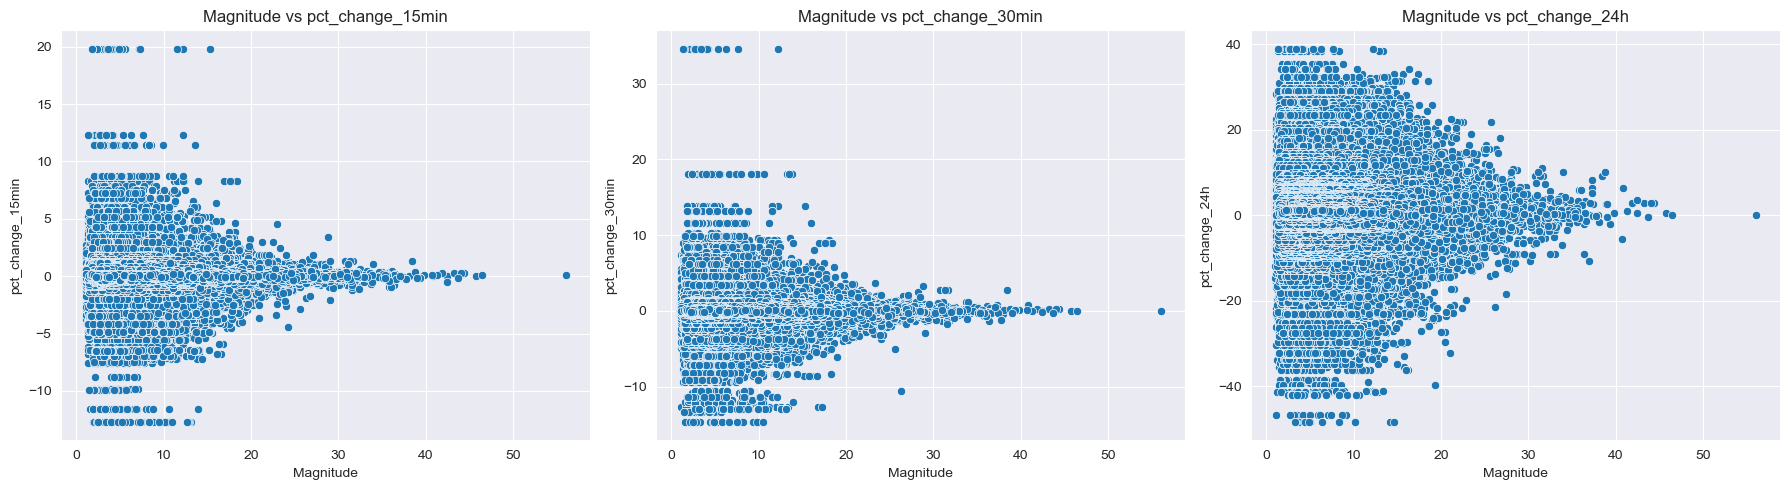

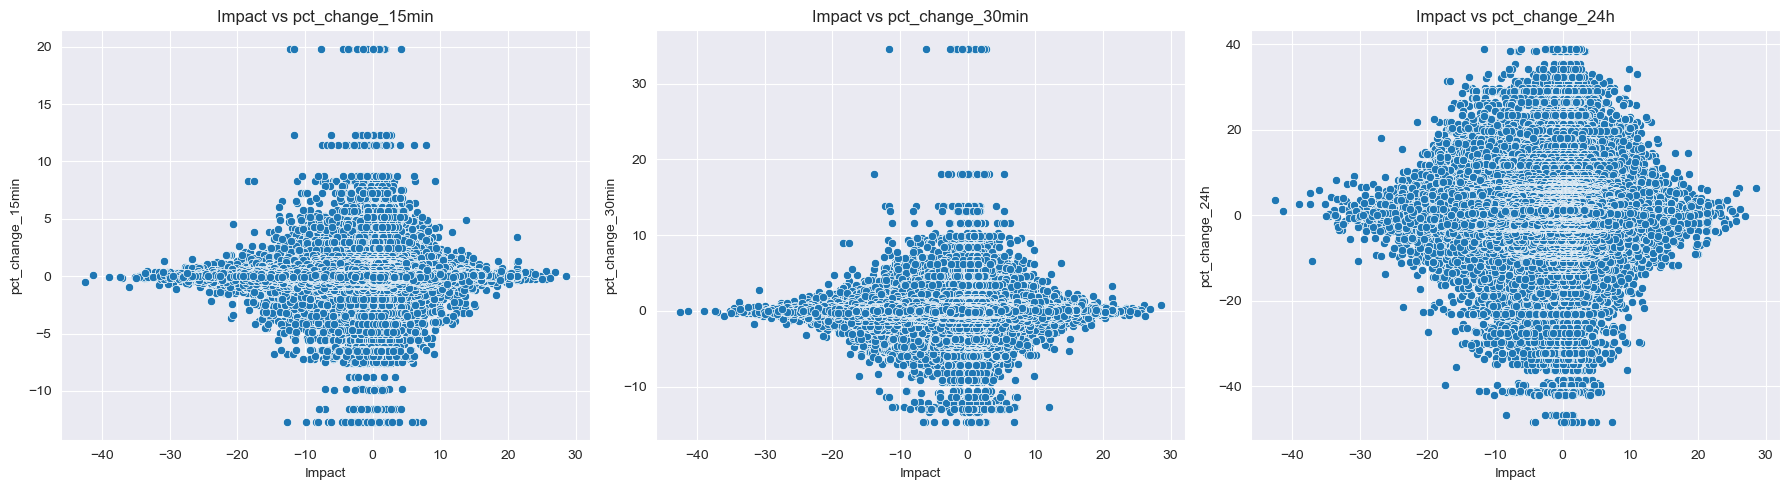

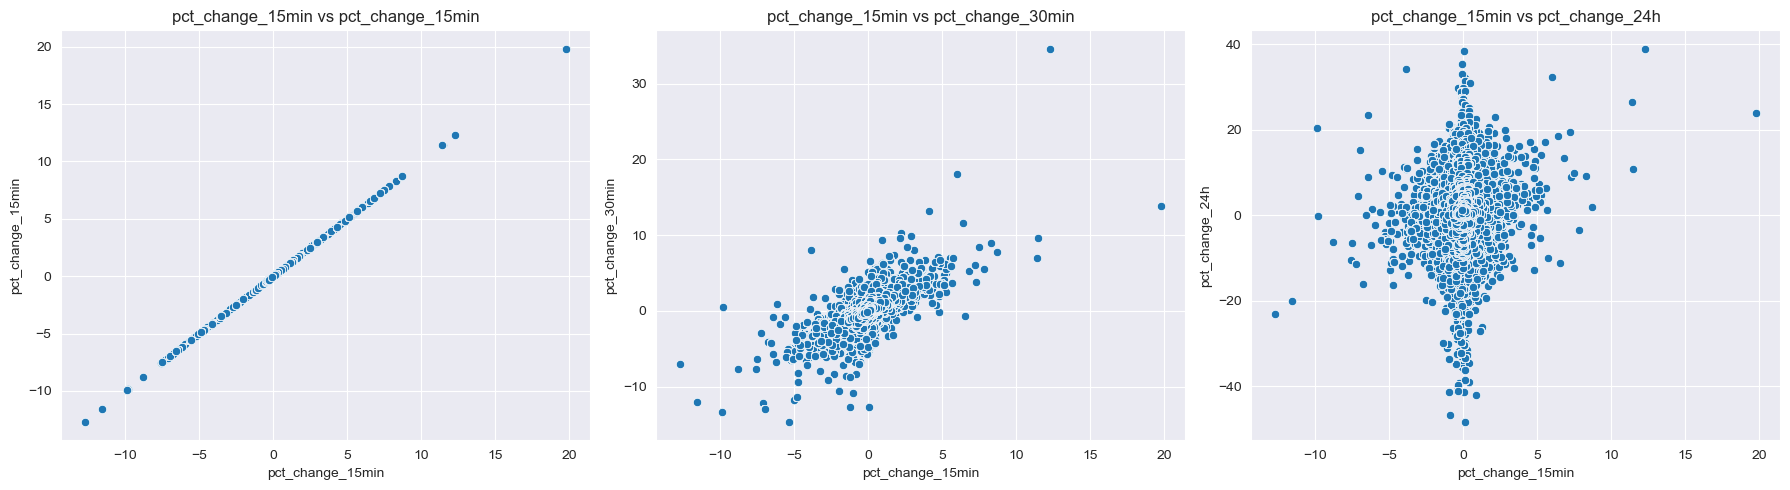

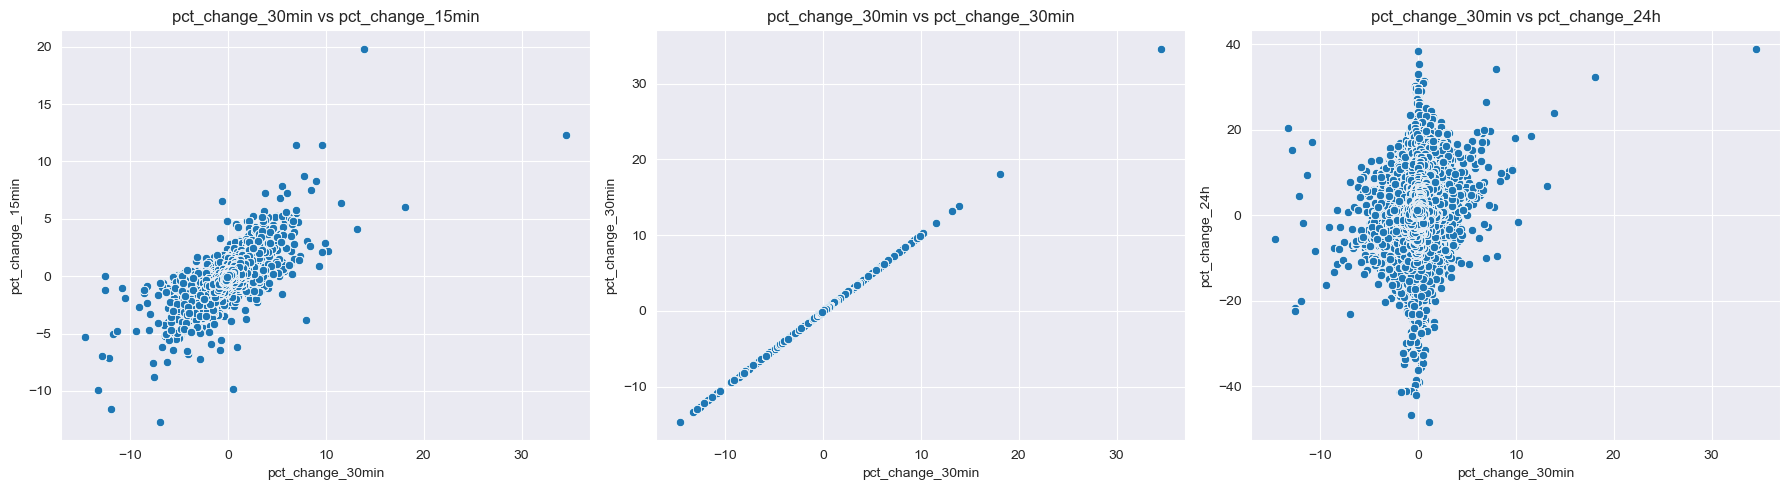

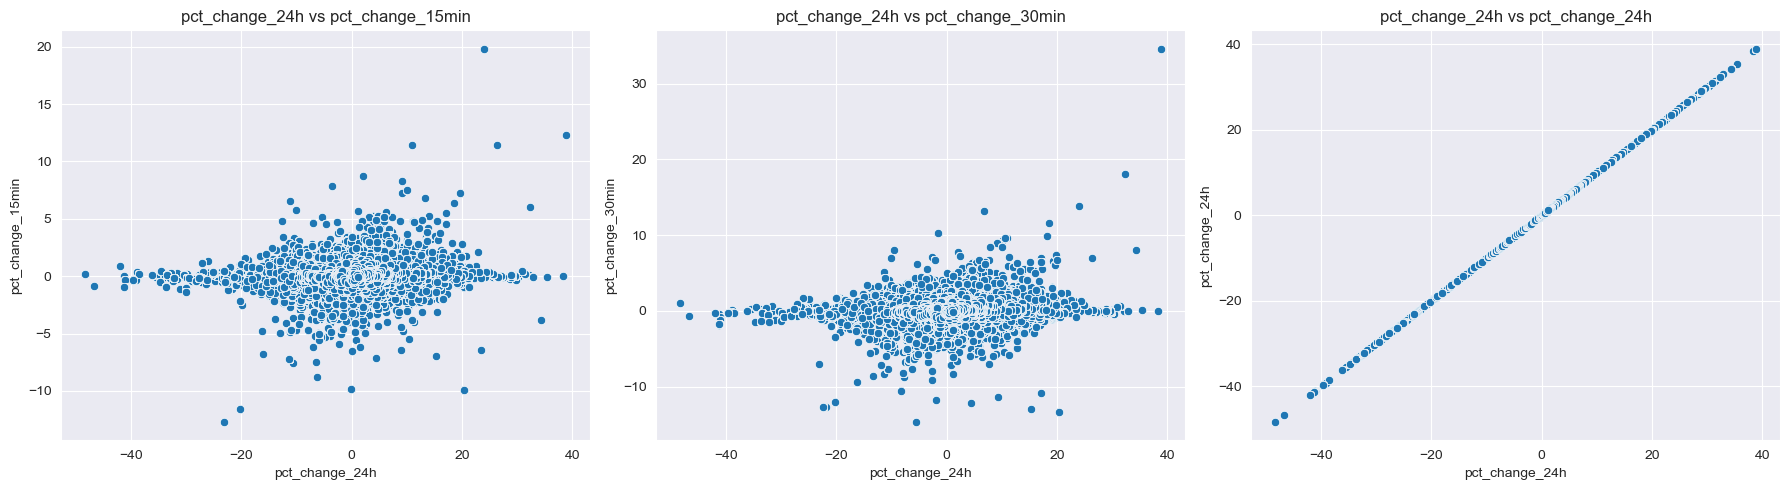

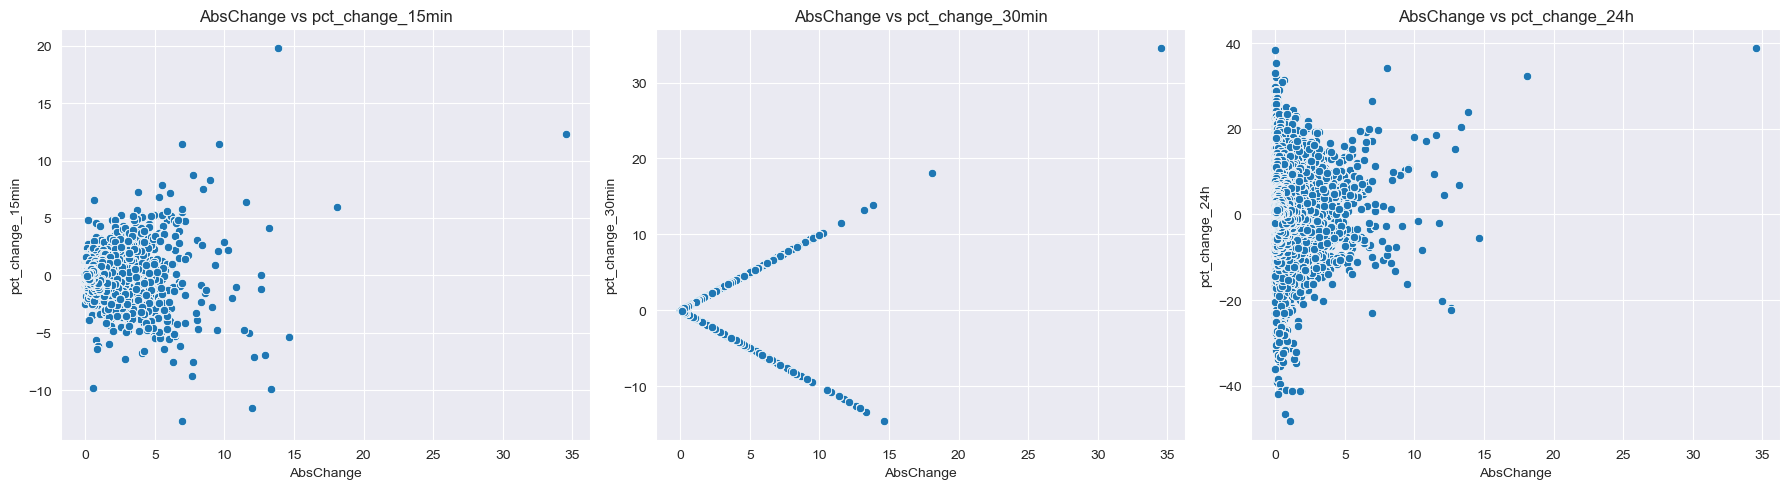

In [8]:
# Plot every column in merged dataframe as a scatter plot against the target variable
for col in numerical_columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.scatterplot(ax=axes[0], x=col, y='pct_change_15min', data=encoded)
    axes[0].set_title(f'{col} vs pct_change_15min')

    sns.scatterplot(ax=axes[1], x=col, y='pct_change_30min', data=encoded)
    axes[1].set_title(f'{col} vs pct_change_30min')

    sns.scatterplot(ax=axes[2], x=col, y='pct_change_24h', data=encoded)
    axes[2].set_title(f'{col} vs pct_change_24h')

    plt.tight_layout()
    plt.show()